In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("Social_Network_Ads.csv")

In [23]:
df.shape

(400, 5)

In [24]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [25]:
df.drop(['User ID'], axis=1, inplace=True)

In [26]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [27]:
df.Purchased.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [28]:
df.Gender.value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [29]:
df.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [30]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [31]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


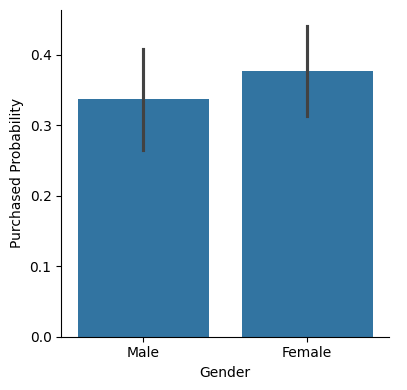

In [32]:
g = sns.catplot(x='Gender', y='Purchased', data=df, kind='bar', height=4)
g.set_ylabels("Purchased Probability")
plt.show()

Purchased         0         1
Gender                       
Female     0.622549  0.377451
Male       0.663265  0.336735


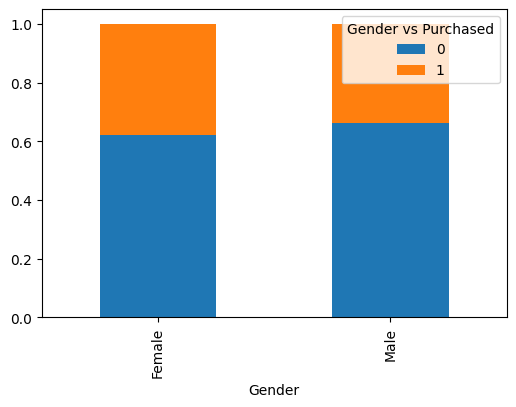

In [34]:
M2 = pd.crosstab(df.Gender, df.Purchased, normalize='index')
print(M2)
M2.plot.bar(figsize=(6,4), stacked=True)
plt.legend(title='Gender vs Purchased', loc='upper right')
plt.show()

In [35]:
df2 = df.drop(['Gender'], axis=1)

In [36]:
df2

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


(3, 3)


<Axes: >

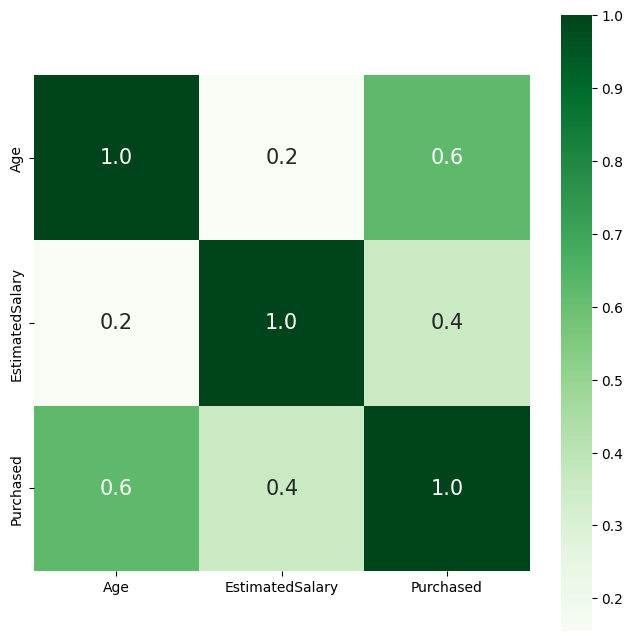

In [37]:
corr = df2.corr()
print(corr.shape)
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [38]:
X = df.drop(['Gender','Purchased'],axis=1)
Y = df['Purchased']
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)
print("Training and Testing split was successful")

Training and Testing split was successful


In [45]:
from sklearn.linear_model import LogisticRegression
basemodel = LogisticRegression()
basemodel.fit(X_train, y_train)
print("Training Accuracy: ", basemodel.score(X_train,y_train)*100)

Training Accuracy:  83.75


In [46]:
y_predict = basemodel.predict(X_test)
print("Testing Accuracy: ", basemodel.score(X_test, y_test)*100)

Testing Accuracy:  88.75


In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = df[['Age','EstimatedSalary']]
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size= 0.2, random_state= 42)
print("Training and Testing Split was Successful")

Training and Testing Split was Successful


In [51]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Training Accuracy: ", model.score(X_train,y_train)*100)
print("Training Accuracy: ", model.score(X_test,y_test)*100)

Training Accuracy:  80.9375
Training Accuracy:  87.5


In [52]:
from sklearn.metrics import accuracy_score
Acc= accuracy_score(y_test,y_predict)
print(Acc)

0.875
